# Predicting CO<sub>2</sub> emission in the new retail-sales cars of Canada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
!pip install sklearn

# Reading Dataset

In [3]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Checking data for null values

In [4]:
#count num of blanks in cols
no_data=df.isnull()

# checking null values in  dataset
for column in no_data.columns.values.tolist():
    print(column)
    print(no_data[column].value_counts())
    print('----------------------------------------------------')

MODELYEAR
False    1067
Name: MODELYEAR, dtype: int64
----------------------------------------------------
MAKE
False    1067
Name: MAKE, dtype: int64
----------------------------------------------------
MODEL
False    1067
Name: MODEL, dtype: int64
----------------------------------------------------
VEHICLECLASS
False    1067
Name: VEHICLECLASS, dtype: int64
----------------------------------------------------
ENGINESIZE
False    1067
Name: ENGINESIZE, dtype: int64
----------------------------------------------------
CYLINDERS
False    1067
Name: CYLINDERS, dtype: int64
----------------------------------------------------
TRANSMISSION
False    1067
Name: TRANSMISSION, dtype: int64
----------------------------------------------------
FUELTYPE
False    1067
Name: FUELTYPE, dtype: int64
----------------------------------------------------
FUELCONSUMPTION_CITY
False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64
----------------------------------------------------
FUELCONSUMPTION_HWY
F

# EDA

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# shortlisting vars for regression
df_fc = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df_fc.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,2.0,4,8.5,196
1,2014,2.4,4,9.6,221
2,2014,1.5,4,5.9,136
3,2014,3.5,6,11.1,255
4,2014,3.5,6,10.6,244


In [7]:
!pip install seaborn

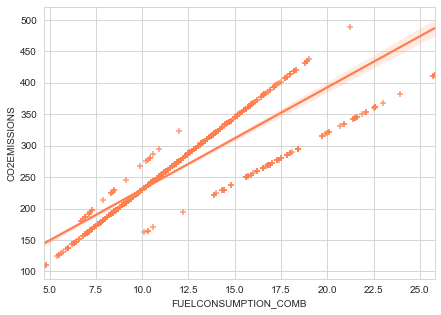

In [8]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
sns.regplot(df_fc['FUELCONSUMPTION_COMB'], df_fc['CO2EMISSIONS'], color='coral', marker='+')

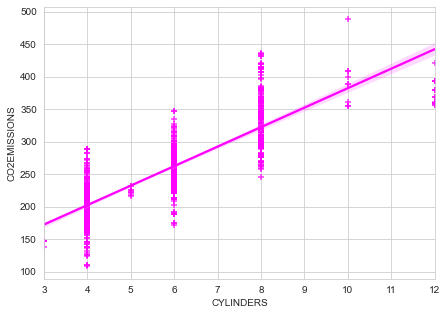

In [9]:
plt.figure(figsize=(7,5))
sns.regplot(df_fc['CYLINDERS'], df_fc['CO2EMISSIONS'], color='magenta', marker='+')

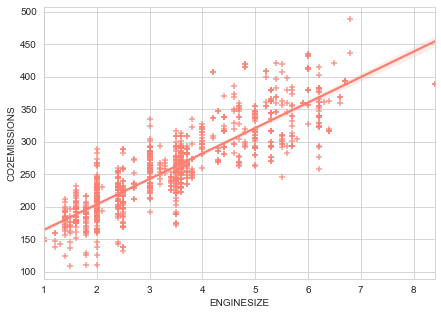

In [10]:
plt.figure(figsize=(7,5))
sns.regplot(df_fc['ENGINESIZE'], df_fc['CO2EMISSIONS'], color='salmon', marker='+')

# Creating Testing and Training datasets

In [11]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(df_fc, test_size=0.2)

In [12]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
tx = train1[['ENGINESIZE']]
ty = train1[['CO2EMISSIONS']]
lr.fit(tx,ty)
print('Intercept:', lr.intercept_)
print('Coefficient:', lr.coef_)

Intercept: [125.92025733]
Coefficient: [[38.86714688]]


Regression Equation:

CO<sub>2</sub> Emissions = 126 + 38.90 x (Engine Size)

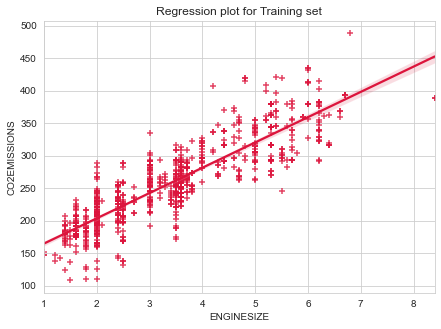

In [13]:
plt.figure(figsize=(7,5))
plt.title('Regression plot for Training set')
sns.regplot(train1['ENGINESIZE'], train1['CO2EMISSIONS'], color='crimson', marker='+')

In [14]:
# testing the model
from sklearn.metrics import r2_score
yhat=lr.predict(tx)
print("MSE: %.2f" % np.mean((yhat - ty) ** 2))
print("R-squared value: %.2f" % r2_score(yhat , ty) )

MSE: 940.40
R-squared value: 0.69


# Multiple Linear Regression 

In [15]:
mx = train1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']] 
lr.fit(mx, ty)
yhatm = lr.predict(mx)

print('Intercept:', lr.intercept_)
print('Coefficient:', lr.coef_)

Intercept: [66.35433565]
Coefficient: [[10.91018991  7.37061884  9.52859249]]


CO<sub>2</sub> Emissions = 68.95 + 11.90 x (Engine Size) + 7.50 x (Cylinder) + 8.95 x (Fuel Consumption)

In [17]:
# function for predicting values
def Check(es, cy, fc):
    print(68.95 + es*11.9 + cy*7.5 + 8.95*fc)
Check(df_fc['ENGINESIZE'], df_fc['CYLINDERS'], df_fc['FUELCONSUMPTION_COMB'])    

0       198.825
1       213.430
2       169.605
3       254.945
4       250.470
         ...   
1062    255.260
1063    254.955
1064    255.260
1065    253.165
1066    266.590
Length: 1067, dtype: float64


In [56]:
def DistributionPlot(Red, Blue, RedName, BlueName, Title):
    plt.figure(figsize=(7,5))

    ax1 = sns.distplot(Red, hist=False, color="crimson", label=RedName)
    ax2 = sns.distplot(Blue, hist=False, color="lightseagreen", label=BlueName, ax=ax1)

    plt.title(Title)

    plt.show()
    plt.close()

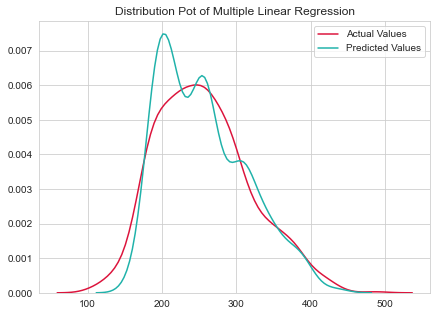

In [57]:
# plotting mlr
DistributionPlot(ty, yhatm, 'Actual Values', 'Predicted Values', 'Distribution Pot of Multiple Linear Regression')

In [16]:
print("MSE: %.2f" % np.mean((yhatm - ty) ** 2))
print("R-squared value: %.2f" % r2_score(yhatm , ty) )

MSE: 551.57
R-squared value: 0.84


# Non Linear Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
px = train1[['CYLINDERS']]
#degree 5
poly = PolynomialFeatures(degree=3)
poly_x = poly.fit_transform(mx)

In [53]:
poly_y = lr.fit(poly_x, ty)
# coeff and intercept
print("Intercept", lr.intercept_)
print("Coefficient", lr.coef_)

Intercept [-159.46278905]
Coefficient [[ 0.00000000e+00 -1.76785472e+00 -1.76608062e+01  8.09673595e+01
  -2.99666207e+01  1.02906830e+01  1.47642121e+01  4.43227377e+00
  -7.03516367e+00 -5.19001894e+00 -7.62880655e+00  7.55579645e+00
   6.19295831e+00 -2.46730364e+00 -4.16867389e+00 -1.28938427e+00
  -9.49455893e-01  2.22642408e+00 -7.52794984e-02  2.17194691e-01]]


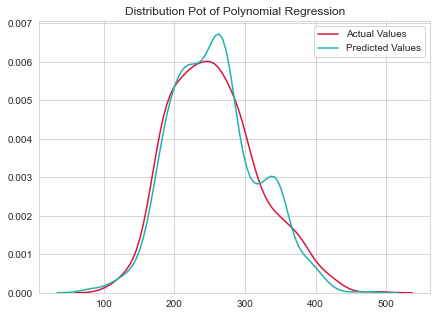

In [58]:
# Plotting Polynomial Regression
x_train = poly.fit_transform(mx)
yhatp = lr.predict(x_train)
DistributionPlot(ty, yhatp, 'Actual Values', 'Predicted Values', 'Distribution Pot of Polynomial Regression')

In [55]:
print("MSE: %.2f" % np.mean((yhatp - ty) ** 2))
print("R-squared value: %.2f" % r2_score(yhatp , ty) )

MSE: 305.69
R-squared value: 0.92


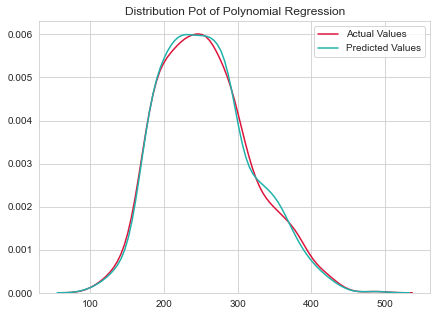

In [91]:
# for degree 5
poly = PolynomialFeatures(degree=8)
x_train1 = poly.fit_transform(mx)
lr.fit(x_train1, ty)
yhatp1 = lr.predict(x_train1)
DistributionPlot(ty, yhatp1, 'Actual Values', 'Predicted Values', 'Distribution Pot of Polynomial Regression')

In [92]:
print("MSE: %.2f" % np.mean((yhatp1 - ty) ** 2))
print("R-squared value: %.2f" % r2_score(yhatp1 , ty) )

MSE: 104.15
R-squared value: 0.97
